In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import matplotlib.pyplot as plt
from matplotlib import rc; rc('text', usetex=True)

In [3]:
M = 1                  # age groups
Ni = 1000*np.ones(M)   # population in each group
N = np.sum(Ni)  

Ia0, Is0, R0 = 1, 0, 0
S0 = N - Ia0 - R0 - Is0

alpha, beta, gamma = 1, 0.2, 1./10 

t = np.linspace(0, 160, 160)
C = np.identity(M)

fsa= 1
model = pyross.models.SIR(S0, Ia0, Is0, alpha, beta, gamma, fsa, M, Ni)

In [4]:
#run simulation and save data
Tf=160; filename='this.mat'
model.simulate(Tf, C, filename)

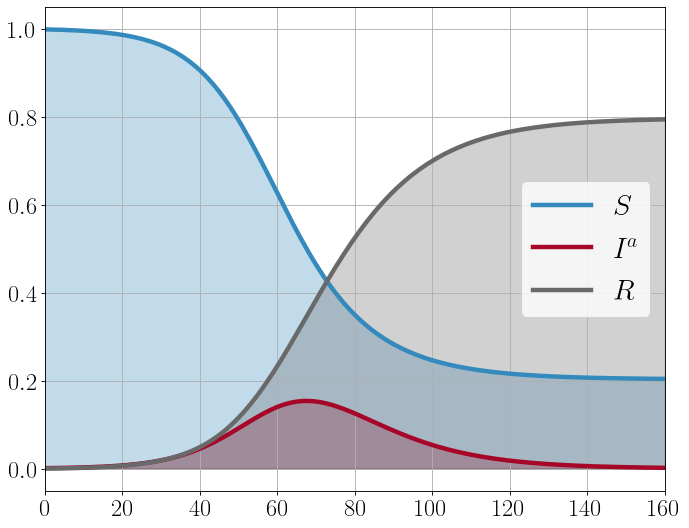

In [5]:
#plot the data

from scipy.io import loadmat
data=loadmat(filename)

S  = data['X'][:,0].flatten()
Ia = data['X'][:,1].flatten()
Is = data['X'][:,2].flatten()
t = data['t'][0]

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, Ia/N, color='#A60628', alpha=0.3)
plt.plot(t, Ia/N, '-', color='#A60628', label='$I^a$', lw=4)

R=N-S-Ia; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)